In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import adclasses
import math
import numpy as np

Using TensorFlow backend.
/home/cfreeman/Documents/NextIT/adclasses2/adclasses2_venv/lib/python3.5/site-packages/tensorflow/python/framework/ops.py:939: DeprecationWarning: builtin type EagerTensor has no __module__ attribute
  EagerTensor = c_api.TFE_Py_InitEagerTensor(_EagerTensorBase)
/home/cfreeman/Documents/NextIT/adclasses2/adclasses2_venv/lib/python3.5/site-packages/tensorflow/python/util/tf_inspect.py:55: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if d.decorator_argspec is not None), _inspect.getargspec(target))


In [2]:
exchange2cpm_path = "data/exchange-2_cpm_results.csv"
exchange3cpm_path = "data/exchange-3_cpm_results.csv"
gift_path = "data/all_data_gift_certificates.csv"
ambient_path = "data/ambient_temperature_system_failure.csv"
ibm_path = "data/ibm-common-stock-closing-prices.csv"
exchange2cpc_path = "data/exchange-2_cpc_results.csv"
exchange3cpc_path = "data/exchange-3_cpc_results.csv"
ec2_cpu_utilization_5f5533_path = "data/ec2_cpu_utilization_5f5533.csv"
ec2_cpu_utilization_ac20cd_path = "data/ec2_cpu_utilization_ac20cd.csv"
international_airline_passengers_path = "data/international-airline-passengers.csv"
###
elb_path = "data/elb_request_count_8c0756.csv"
nyc_path = "data/nyc_taxi.csv"
twitteramzn_path = "data/Twitter_volume_AMZN.csv"
farm_path = "data/FARM_Bowling-Green-5-S_Warren.csv"
twittergoog_path = "data/Twitter_volume_GOOG.csv"
twitterfb_path = "data/Twitter_volume_FB.csv"

# Trend

We can determine if a time series exhibits trend using an Augmented Dickey-Fuller Test:

H0 = trend

Ha = no trend

references: 

https://machinelearningmastery.com/time-series-data-stationary-python/

https://blog.stata.com/2016/06/21/unit-root-tests-in-stata/

https://stats.stackexchange.com/questions/225087/seasonal-data-deemed-stationary-by-adf-and-kpss-tests

Note: The maxlag determines how large of a range we should use to find a trend..if it is too small you may miss the trend!

https://stats.stackexchange.com/questions/57807/confusion-with-augmented-dickey-fuller-test 

But if it is too big, it can take a long time to run

# Datasets making up the trend corpora:

1. exchange-2_cpm_results

2. exchange-3_cpm_results 

3. all_data_gift_certificates 

4. ambient_temperature_system_failure

5. ibm-common-stock-closing-prices

6. exchange-2_cpc_results

7. exchange-3_cpc_results

8. ec2_cpu_utilization_5f5533

9. ec2_cpu_utilization_ac20cd

10. international-airline-passengers

# exchange-2_cpm_results (24)

According to https://github.com/numenta/NAB/blob/master/labels/combined_labels.json

exchange-2_cpm_results.csv only has 2 anomalies:

2011-07-26 06:00:01

2011-08-10 17:00:01

In [3]:
data = pd.read_csv(exchange2cpm_path, header=0)
start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]

print("Start date: ", start_date)
print("\nEnd date: ", end_date)
print("\nMedian:  ",np.median(data["value"].values), "\n")
print(data["value"].describe())
display(data.head())

# determine if there are missing time steps
data["timestamp"] = pd.to_datetime(data["timestamp"],format="%Y-%m-%d %H:%M:%S")
missing = adclasses.find_missing_time_steps(start_date, end_date, '1H', data)
print("\n# of Missing time steps: ", len(missing))

# there are missing steps. interpolate missing time steps
data = adclasses.fill_missing_time_steps(start_date, end_date, '1H', data, method="linear")
data["timestamp"] = pd.to_datetime(data["timestamp"],format="%Y-%m-%d %H:%M:%S")

adclasses.determine_trend(data)

Start date:  2011-07-01 00:00:01

End date:  2011-09-07 15:00:01

Median:   0.2950560069065 

count    1624.000000
mean        0.336523
std         0.162187
min         0.000385
25%         0.208210
50%         0.295056
75%         0.456151
max         1.051442
Name: value, dtype: float64


,timestamp,value
0,2011-07-01 00:00:01,0.401048
1,2011-07-01 01:00:01,0.392719
2,2011-07-01 02:00:01,0.309996
3,2011-07-01 03:00:01,0.212939
4,2011-07-01 04:00:01,0.205801



# of Missing time steps:  25
Duplicate records found: 
                        value
timestamp                    
2011-08-24 12:00:01  0.408490
2011-08-24 12:00:01  0.461745
Removing duplicates and keeping:  
                       value
timestamp                   
2011-08-24 12:00:01  0.40849


Maxlag:   200
p-value: 0.121914
Possible trend.


# exchange-3_cpm_results (24)

According to https://github.com/numenta/NAB/blob/master/labels/combined_labels.json

exchange-3_cpm_results.csv only has 1 anomaly:

2011-08-19 18:15:01

In [5]:
data = pd.read_csv(exchange3cpm_path, header=0)
start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]

print("Start date: ", start_date)
print("\nEnd date: ", end_date)
print("\nMedian:  ",np.median(data["value"].values), "\n")
print(data["value"].describe())
display(data.head())

# determine if there are missing time steps
data["timestamp"] = pd.to_datetime(data["timestamp"],format="%Y-%m-%d %H:%M:%S")
missing = adclasses.find_missing_time_steps(start_date, end_date, '1H', data)
print("\n# of Missing time steps: ", len(missing))

# there are missing steps. interpolate missing time steps
data = adclasses.fill_missing_time_steps(start_date, end_date, '1H', data, method="linear")
data["timestamp"] = pd.to_datetime(data["timestamp"],format="%Y-%m-%d %H:%M:%S")

adclasses.determine_trend(data)

Start date:  2011-07-01 00:15:01

End date:  2011-09-07 14:15:01

Median:   0.6953040255295 

count    1538.000000
mean        0.772790
std         0.337081
min         0.320650
25%         0.562521
50%         0.695304
75%         0.895622
max         5.497540
Name: value, dtype: float64


,timestamp,value
0,2011-07-01 00:15:01,0.405423
1,2011-07-01 01:15:01,0.433961
2,2011-07-01 02:15:01,0.389268
3,2011-07-01 03:15:01,0.368099
4,2011-07-01 04:15:01,0.365234



# of Missing time steps:  109


Maxlag:   200
p-value: 0.393968
Possible trend.


# elb_request_count_8c0756 (288)

According to https://github.com/numenta/NAB/blob/master/labels/combined_labels.json

elb_request_count_8c0756.csv only has 2 anomalies:

2014-04-12 17:24:00

2014-04-22 19:34:00

In [7]:
data = pd.read_csv(elb_path, header=0)
start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]

print("Start date: ", start_date)
print("\nEnd date: ", end_date)
print("\nMedian:  ",np.median(data["value"].values), "\n")
print(data["value"].describe())
display(data.head())

# determine if there are missing time steps
data["timestamp"] = pd.to_datetime(data["timestamp"],format="%Y-%m-%d %H:%M:%S")
missing = adclasses.find_missing_time_steps(start_date, end_date, '5min', data)
print("\n# of Missing time steps: ", len(missing))

# there are missing steps. interpolate missing time steps
data = adclasses.fill_missing_time_steps(start_date, end_date, '5min', data, method="linear")
data["timestamp"] = pd.to_datetime(data["timestamp"],format="%Y-%m-%d %H:%M:%S")

adclasses.determine_trend(data)

Start date:  2014-04-10 00:04:00

End date:  2014-04-24 00:39:00

Median:   48.0 

count    4032.000000
mean       61.837054
std        56.664703
min         1.000000
25%        15.000000
50%        48.000000
75%        89.000000
max       656.000000
Name: value, dtype: float64


,timestamp,value
0,2014-04-10 00:04:00,94.0
1,2014-04-10 00:09:00,56.0
2,2014-04-10 00:14:00,187.0
3,2014-04-10 00:19:00,95.0
4,2014-04-10 00:24:00,51.0



# of Missing time steps:  8


Maxlag:   200
p-value: 0.000000
There is no trend!


# nyc_taxi (48)

According to https://github.com/numenta/NAB/blob/master/labels/combined_labels.json

nyc_taxi.csv has the anomalies:

2014-11-01 19:00:00

2014-11-27 15:30:00

2014-12-25 15:00:00

2015-01-01 01:00:00

2015-01-27 00:00:00

In [9]:
data = pd.read_csv(nyc_path, header=0)
start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]

print("Start date: ", start_date)
print("\nEnd date: ", end_date)
print("\nMedian:  ",np.median(data["value"].values), "\n")
print(data["value"].describe())
display(data.head())

# determine if there are missing time steps
data["timestamp"] = pd.to_datetime(data["timestamp"],format="%Y-%m-%d %H:%M:%S")
missing = adclasses.find_missing_time_steps(start_date, end_date, '30min', data)
print("\n# of Missing time steps: ", len(missing))

adclasses.determine_trend(data)

Start date:  2014-07-01 00:00:00

End date:  2015-01-31 23:30:00

Median:   16778.0 

count    10320.000000
mean     15137.569380
std       6939.495808
min          8.000000
25%      10262.000000
50%      16778.000000
75%      19838.750000
max      39197.000000
Name: value, dtype: float64


,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820



# of Missing time steps:  0


Maxlag:   200
p-value: 0.000000
There is no trend!


# Twitter_volume_AMZN (288)

According to https://github.com/numenta/NAB/blob/master/labels/combined_labels.json

Twitter_volume_AMZN.csv has the anomalies:

2015-03-05 19:47:53

2015-03-11 20:57:53
        
2015-04-01 21:57:53
       
2015-04-08 04:52:53

In [7]:
data = pd.read_csv(twitteramzn_path, header=0)
start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]

print("Start date: ", start_date)
print("\nEnd date: ", end_date)
print("\nMedian:  ",np.median(data["value"].values), "\n")
print(data["value"].describe())
display(data.head())

# determine if there are missing time steps
data["timestamp"] = pd.to_datetime(data["timestamp"],format="%Y-%m-%d %H:%M:%S")
missing = adclasses.find_missing_time_steps(start_date, end_date, '5min', data)
print("\n# of Missing time steps: ", len(missing))

# there are missing steps. interpolate missing time steps
data = adclasses.fill_missing_time_steps(start_date, end_date, '5min', data, method="linear")
data["timestamp"] = pd.to_datetime(data["timestamp"],format="%Y-%m-%d %H:%M:%S")

adclasses.determine_trend(data)

Start date:  2015-02-26 21:42:53

End date:  2015-04-22 20:52:53

Median:   50.0 

count    15831.000000
mean        53.298465
std         30.553147
min          0.000000
25%         36.000000
50%         50.000000
75%         65.000000
max       1673.000000
Name: value, dtype: float64


,timestamp,value
0,2015-02-26 21:42:53,57
1,2015-02-26 21:47:53,43
2,2015-02-26 21:52:53,55
3,2015-02-26 21:57:53,64
4,2015-02-26 22:02:53,93



# of Missing time steps:  0


Maxlag:   200
p-value: 0.000000
There is no trend!


# all_data_gift_certificates (24)

According to annotations, the anomalies are:

2016-04-06 16:00:00

2016-07-25 19:00:00

2016-11-19 20:00:00

In [8]:
data = pd.read_csv(gift_path, header=0)
data["timestamp"] = data["BeginTime"]
data["value"] =  data["Count"]
start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]

print("Start date: ", start_date)
print("\nEnd date: ", end_date)
print("\nMedian:  ",np.median(data["value"].values), "\n")
print(data["value"].describe())
display(data.head())

# determine if there are missing time steps
data["timestamp"] = pd.to_datetime(data["timestamp"],format="%Y-%m-%d %H:%M:%S")
missing = adclasses.find_missing_time_steps(start_date, end_date, '1H', data)
print("\n# of Missing time steps: ", len(missing))

# there are missing steps. interpolate missing time steps
data = adclasses.fill_missing_time_steps(start_date, end_date, '1H', data, method="linear")
data["timestamp"] = pd.to_datetime(data["timestamp"],format="%Y-%m-%d %H:%M:%S")

adclasses.determine_trend(data)

Start date:  2016-01-01 00:00:00

End date:  2016-12-31 23:00:00

Median:   0.0 

count    8784.000000
mean        0.954463
std         1.881972
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        28.000000
Name: value, dtype: float64


,BeginTime,Count,timestamp,value
0,2016-01-01 00:00:00,0,2016-01-01 00:00:00,0
1,2016-01-01 01:00:00,1,2016-01-01 01:00:00,1
2,2016-01-01 02:00:00,2,2016-01-01 02:00:00,2
3,2016-01-01 03:00:00,3,2016-01-01 03:00:00,3
4,2016-01-01 04:00:00,1,2016-01-01 04:00:00,1



# of Missing time steps:  0


Maxlag:   200
p-value: 0.141693
Possible trend.


# FARM_Bowling-Green-5-S_Warren (48)

According to annotations, the anomalies are:

2016-03-15 21:00:00

2016-04-12 11:30:00

2016-05-01 21:30:00

In [11]:
data = pd.read_csv(farm_path,header=0)
start_date = data["UTME"].values[0]
end_date = data["UTME"].values[-1]
print("Start date: ", start_date)
print("\nEnd date: ", end_date)
narrowed = []
for item in data["TAIR"].values:
    if not math.isnan(item):
        narrowed.append(item)
print("\nMedian:  ",np.median(narrowed), "\n")
print(data["TAIR"].describe())
display(data.head())

data["UTME"] = pd.to_datetime(data["UTME"],format="%Y-%m-%d %H:%M:%S UTC")
del data["NET"]
del data["STID"]
tair_data = pd.DataFrame({"UTME":data["UTME"],"TAIR":data["TAIR"]})
tair_data.set_index("UTME",inplace=True)
missing = tair_data[tair_data['TAIR'].isnull()].index
print("\n # of missing time steps using old granularity: ",len(missing))
tair_data = tair_data.interpolate()

resampled_tair_data = tair_data.resample('30Min', how={'TAIR': np.mean})

def round_2(num):
    return round(num,2)

resampled_tair_data["TAIR"]=resampled_tair_data["TAIR"].apply(round_2)

renamed_resampled_tair_data = pd.DataFrame({"timestamp": resampled_tair_data.index, "value":resampled_tair_data["TAIR"]})

display(renamed_resampled_tair_data.head())

adclasses.determine_trend(renamed_resampled_tair_data)

Start date:  2016-03-01 00:00:00 UTC

End date:  2016-05-31 23:55:00 UTC

Median:   15.455 

count    26465.000000
mean        14.830008
std          6.676933
min         -2.490000
25%         10.198000
50%         15.455000
75%         19.325000
max         30.304000
Name: TAIR, dtype: float64


,NET,STID,UTME,TAIR,RELH,TDPT,WSPD,WDIR,WSMX,WDMX,SRAD,PRCP
0,KYMN,FARM,2016-03-01 00:00:00 UTC,12.886,40.8,-0.14,1.15,183.9,1.31,180.0,0.33,0.0
1,KYMN,FARM,2016-03-01 00:05:00 UTC,13.217,40.8,0.18,1.02,196.8,1.11,192.3,0.17,0.0
2,KYMN,FARM,2016-03-01 00:10:00 UTC,12.901,41.5,0.10,0.82,211.2,0.92,202.8,0.17,0.0
3,KYMN,FARM,2016-03-01 00:15:00 UTC,11.200,48.2,0.63,0.73,220.5,0.92,220.4,0.00,0.0
4,KYMN,FARM,2016-03-01 00:20:00 UTC,10.414,49.8,0.37,0.44,220.5,0.69,220.5,0.00,0.0



 # of missing time steps using old granularity:  19


/home/cfreeman/Documents/NextIT/adclasses2/adclasses2_venv/lib/python3.5/site-packages/ipykernel_launcher.py:23: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)


,timestamp,value
UTME,,
2016-03-01 00:00:00,2016-03-01 00:00:00,11.85
2016-03-01 00:30:00,2016-03-01 00:30:00,10.59
2016-03-01 01:00:00,2016-03-01 01:00:00,10.12
2016-03-01 01:30:00,2016-03-01 01:30:00,8.50
2016-03-01 02:00:00,2016-03-01 02:00:00,7.68




Maxlag:   200
p-value: 0.019103
There is no trend!


# ambient_temperature_system_failure (24)

According to https://github.com/numenta/NAB/blob/master/labels/combined_labels.json

ambient_temperature_system_failure.csv has the anomalies:

2013-12-22 20:00:00

2014-04-13 09:00:00

In [14]:
data = pd.read_csv(ambient_path, header=0)
start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]

print("Start date: ", start_date)
print("\nEnd date: ", end_date)
print("\nMedian:  ",np.median(data["value"].values), "\n")
print(data["value"].describe())
display(data.head())

# determine if there are missing time steps
data["timestamp"] = pd.to_datetime(data["timestamp"],format="%Y-%m-%d %H:%M:%S")
missing = adclasses.find_missing_time_steps(start_date, end_date, '1H', data)
print("\n# of Missing time steps: ", len(missing))

# there are missing steps. interpolate missing time steps
data = adclasses.fill_missing_time_steps(start_date, end_date, '1H', data, method="linear")
data["timestamp"] = pd.to_datetime(data["timestamp"],format="%Y-%m-%d %H:%M:%S")

adclasses.determine_trend(data)

Start date:  2013-07-04 00:00:00

End date:  2014-05-28 15:00:00

Median:   71.85849263 

count    7267.000000
mean       71.242433
std         4.247509
min        57.458406
25%        68.369411
50%        71.858493
75%        74.430958
max        86.223213
Name: value, dtype: float64


,timestamp,value
0,2013-07-04 00:00:00,69.880835
1,2013-07-04 01:00:00,71.220227
2,2013-07-04 02:00:00,70.877805
3,2013-07-04 03:00:00,68.959400
4,2013-07-04 04:00:00,69.283551



# of Missing time steps:  621


Maxlag:   200
p-value: 0.165299
Possible trend.


# Twitter_volume_GOOG (288)

According to https://github.com/numenta/NAB/blob/master/labels/combined_labels.json

Twitter_volume_GOOG.csv only has 4 anomalies:

2015-03-13 20:22:53

2015-03-14 16:27:53

2015-03-22 22:52:53

2015-04-01 05:27:53

In [11]:
data = pd.read_csv(twittergoog_path, header=0)
start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]

print("Start date: ", start_date)
print("\nEnd date: ", end_date)
print("\nMedian:  ",np.median(data["value"].values), "\n")
print(data["value"].describe())
display(data.head())

# determine if there are missing time steps
data["timestamp"] = pd.to_datetime(data["timestamp"],format="%Y-%m-%d %H:%M:%S")
missing = adclasses.find_missing_time_steps(start_date, end_date, '5min', data)
print("\n# of Missing time steps: ", len(missing))

# there are missing steps. interpolate missing time steps
data = adclasses.fill_missing_time_steps(start_date, end_date, '5min', data, method="linear")
data["timestamp"] = pd.to_datetime(data["timestamp"],format="%Y-%m-%d %H:%M:%S")

adclasses.determine_trend(data)

Start date:  2015-02-26 21:42:53

End date:  2015-04-22 21:47:53

Median:   16.0 

count    15842.000000
mean        20.736397
std         18.564627
min          0.000000
25%         11.000000
50%         16.000000
75%         26.000000
max        465.000000
Name: value, dtype: float64


,timestamp,value
0,2015-02-26 21:42:53,35
1,2015-02-26 21:47:53,41
2,2015-02-26 21:52:53,32
3,2015-02-26 21:57:53,36
4,2015-02-26 22:02:53,32



# of Missing time steps:  0


Maxlag:   200
p-value: 0.000000
There is no trend!


# Twitter_volume_FB (288)

According to https://github.com/numenta/NAB/blob/master/labels/combined_labels.json

Twitter_volume_FB.csv only has 2 anomalies:

2015-03-16 07:07:53

2015-04-03 17:47:53

In [12]:
data = pd.read_csv(twitterfb_path, header=0)
start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]

print("Start date: ", start_date)
print("\nEnd date: ", end_date)
print("\nMedian:  ",np.median(data["value"].values), "\n")
print(data["value"].describe())
display(data.head())

# determine if there are missing time steps
data["timestamp"] = pd.to_datetime(data["timestamp"],format="%Y-%m-%d %H:%M:%S")
missing = adclasses.find_missing_time_steps(start_date, end_date, '5min', data)
print("\n# of Missing time steps: ", len(missing))

# there are missing steps. interpolate missing time steps
data = adclasses.fill_missing_time_steps(start_date, end_date, '5min', data, method="linear")
data["timestamp"] = pd.to_datetime(data["timestamp"],format="%Y-%m-%d %H:%M:%S")

adclasses.determine_trend(data)

Start date:  2015-02-26 21:42:53

End date:  2015-04-22 21:02:53

Median:   14.0 

count    15833.000000
mean        17.811280
std         19.740055
min          0.000000
25%          9.000000
50%         14.000000
75%         22.000000
max       1258.000000
Name: value, dtype: float64


,timestamp,value
0,2015-02-26 21:42:53,53
1,2015-02-26 21:47:53,64
2,2015-02-26 21:52:53,49
3,2015-02-26 21:57:53,48
4,2015-02-26 22:02:53,22



# of Missing time steps:  0


Maxlag:   200
p-value: 0.000000
There is no trend!


# ibm-common-stock-closing-prices

According to annotations, the anomalies are:

1965-06-08 00:00:00

In [13]:
data = pd.read_csv(ibm_path,header=0)
data["Date"] = pd.to_datetime(data["Date"],format="%Y-%m-%d")

data["timestamp"] = data["Date"]
del data["Date"]
data["value"] = data["IBM common stock closing prices"]
del data["IBM common stock closing prices"]

start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]
print("Start date: ", start_date)
print("\nEnd date: ", end_date)
print("\nMedian:  ",np.median(data["value"].values))
print(data["value"].describe())

# determine if there are missing time steps
missing = adclasses.find_missing_time_steps(start_date, end_date, '1D', data)
print("\n# of Missing time steps: ", len(missing))

# there are missing steps which reflect weekends!! interpolate missing time steps
data = adclasses.fill_missing_time_steps(start_date, end_date, '1D', data, method="linear")
data["timestamp"] = pd.to_datetime(data["timestamp"],format="%Y-%m-%d")

adclasses.determine_trend(data)

Start date:  1962-01-02T00:00:00.000000000

End date:  1965-12-31T00:00:00.000000000

Median:   460.625
count    1008.000000
mean      462.817688
std        60.441924
min       306.000000
25%       420.437500
50%       460.625000
75%       500.750000
max       598.500000
Name: value, dtype: float64

# of Missing time steps:  452


Maxlag:   200
p-value: 0.189501
Possible trend.


# exchange-2_cpc_results

According to https://github.com/numenta/NAB/blob/master/labels/combined_labels.json

exchange-2_cpc_results.csv only has 1 anomaly:

2011-07-14 13:00:01

In [14]:
data = pd.read_csv(exchange2cpc_path, header=0)
start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]

print("Start date: ", start_date)
print("\nEnd date: ", end_date)
print("\nMedian:  ",np.median(data["value"].values), "\n")
print(data["value"].describe())
display(data.head())

# determine if there are missing time steps
data["timestamp"] = pd.to_datetime(data["timestamp"],format="%Y-%m-%d %H:%M:%S")
missing = adclasses.find_missing_time_steps(start_date, end_date, '1H', data)
print("\n# of Missing time steps: ", len(missing))

# there are missing steps. interpolate missing time steps
data = adclasses.fill_missing_time_steps(start_date, end_date, '1H', data, method="linear")
data["timestamp"] = pd.to_datetime(data["timestamp"],format="%Y-%m-%d %H:%M:%S")

adclasses.determine_trend(data)

Start date:  2011-07-01 00:00:01

End date:  2011-09-07 15:00:01

Median:   0.10083252172849999 

count    1624.000000
mean        0.101823
std         0.033729
min         0.026843
25%         0.076633
50%         0.100833
75%         0.123618
max         0.226598
Name: value, dtype: float64


,timestamp,value
0,2011-07-01 00:00:01,0.081965
1,2011-07-01 01:00:01,0.098972
2,2011-07-01 02:00:01,0.065314
3,2011-07-01 03:00:01,0.070663
4,2011-07-01 04:00:01,0.102490



# of Missing time steps:  25
Duplicate records found: 
                        value
timestamp                    
2011-08-24 12:00:01  0.131250
2011-08-24 12:00:01  0.119453
Removing duplicates and keeping:  
                       value
timestamp                   
2011-08-24 12:00:01  0.13125


Maxlag:   200
p-value: 0.278038
Possible trend.


#  exchange-3_cpc_results

According to https://github.com/numenta/NAB/blob/master/labels/combined_labels.json

exchange-3_cpc_results.csv only has 3 anomalies:

2011-07-14 10:15:01

2011-07-20 10:15:01

2011-08-13 10:15:01

In [15]:
data = pd.read_csv(exchange3cpc_path, header=0)
start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]

print("Start date: ", start_date)
print("\nEnd date: ", end_date)
print("\nMedian:  ",np.median(data["value"].values), "\n")
print(data["value"].describe())
display(data.head())

# determine if there are missing time steps
data["timestamp"] = pd.to_datetime(data["timestamp"],format="%Y-%m-%d %H:%M:%S")
missing = adclasses.find_missing_time_steps(start_date, end_date, '1H', data)
print("\n# of Missing time steps: ", len(missing))

# there are missing steps. interpolate missing time steps
data = adclasses.fill_missing_time_steps(start_date, end_date, '1H', data, method="linear")
data["timestamp"] = pd.to_datetime(data["timestamp"],format="%Y-%m-%d %H:%M:%S")

adclasses.determine_trend(data)

Start date:  2011-07-01 00:15:01

End date:  2011-09-07 14:15:01

Median:   0.1181835237965 

count    1538.000000
mean        0.137259
std         0.075671
min         0.038899
25%         0.097923
50%         0.118184
75%         0.153230
max         1.034000
Name: value, dtype: float64


,timestamp,value
0,2011-07-01 00:15:01,0.102709
1,2011-07-01 01:15:01,0.068039
2,2011-07-01 02:15:01,0.077994
3,2011-07-01 03:15:01,0.077682
4,2011-07-01 04:15:01,0.077966



# of Missing time steps:  109


Maxlag:   200
p-value: 0.473080
Possible trend.


# ec2_cpu_utilization_5f5533

According to https://github.com/numenta/NAB/blob/master/labels/combined_labels.json

ec2_cpu_utilization_5f5533.csv only has 2 anomalies:

2014-02-19 00:22:00
 
2014-02-24 18:37:00

In [16]:
data = pd.read_csv(ec2_cpu_utilization_5f5533_path, header=0)
start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]

print("Start date: ", start_date)
print("\nEnd date: ", end_date)
print("\nMedian:  ",np.median(data["value"].values), "\n")
print(data["value"].describe())
display(data.head())

# determine if there are missing time steps
data["timestamp"] = pd.to_datetime(data["timestamp"],format="%Y-%m-%d %H:%M:%S")
missing = adclasses.find_missing_time_steps(start_date, end_date, '5min', data)
print("\n# of Missing time steps: ", len(missing))

# there are missing steps. interpolate missing time steps
data = adclasses.fill_missing_time_steps(start_date, end_date, '5min', data, method="linear")
data["timestamp"] = pd.to_datetime(data["timestamp"],format="%Y-%m-%d %H:%M:%S")

adclasses.determine_trend(data)

Start date:  2014-02-14 14:27:00

End date:  2014-02-28 14:22:00

Median:   42.918 

count    4032.000000
mean       43.110372
std         4.303565
min        34.766000
25%        39.296000
50%        42.918000
75%        46.006000
max        68.092000
Name: value, dtype: float64


,timestamp,value
0,2014-02-14 14:27:00,51.846
1,2014-02-14 14:32:00,44.508
2,2014-02-14 14:37:00,41.244
3,2014-02-14 14:42:00,48.568
4,2014-02-14 14:47:00,46.714



# of Missing time steps:  0


Maxlag:   200
p-value: 0.865376
Possible trend.


# ec2_cpu_utilization_ac20cd

According to https://github.com/numenta/NAB/blob/master/labels/combined_labels.json

ec2_cpu_utilization_ac20cd.csv only has 1 anomaly:

2014-04-15 00:49:00

In [17]:
data = pd.read_csv(ec2_cpu_utilization_ac20cd_path, header=0)
start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]

print("Start date: ", start_date)
print("\nEnd date: ", end_date)
print("\nMedian:  ",np.median(data["value"].values), "\n")
print(data["value"].describe())
display(data.head())

# determine if there are missing time steps
data["timestamp"] = pd.to_datetime(data["timestamp"],format="%Y-%m-%d %H:%M:%S")
missing = adclasses.find_missing_time_steps(start_date, end_date, '5min', data)
print("\n# of Missing time steps: ", len(missing))

# there are missing steps. interpolate missing time steps
data = adclasses.fill_missing_time_steps(start_date, end_date, '5min', data, method="linear")
data["timestamp"] = pd.to_datetime(data["timestamp"],format="%Y-%m-%d %H:%M:%S")

adclasses.determine_trend(data)

Start date:  2014-04-02 14:29:00

End date:  2014-04-16 14:49:00

Median:   34.662 

count    4032.000000
mean       40.985085
std        21.921157
min         2.464000
25%        33.146000
50%        34.662000
75%        37.633000
max        99.742000
Name: value, dtype: float64


,timestamp,value
0,2014-04-02 14:29:00,42.652
1,2014-04-02 14:34:00,41.362
2,2014-04-02 14:39:00,43.408
3,2014-04-02 14:44:00,40.262
4,2014-04-02 14:49:00,40.328



# of Missing time steps:  5


Maxlag:   200
p-value: 0.782828
Possible trend.


# international-airline-passengers

Artificially injected 1 outlier:

1957-05

In [3]:
# https://datamarket.com/data/set/22u3/international-airline-passengers-monthly-totals-in-thousands-jan-49-dec-60#!ds=22u3&display=line
data = pd.read_csv(international_airline_passengers_path, header=0)
start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]

print("Start date: ", start_date)
print("\nEnd date: ", end_date)
narrowed = []
for item in data["value"].values:
    if not math.isnan(item):
        narrowed.append(item)
print("Median:  ",np.median(narrowed))
print(data["value"].describe())
display(data.head())

# determine if there are missing time steps
data["timestamp"] = pd.to_datetime(data["timestamp"],format="%Y-%m")
missing = adclasses.find_missing_time_steps(start_date, end_date, '1MS', data)
print("\n# of Missing time steps: ", len(missing))

adclasses.determine_trend(data)

Start date:  1949-01

End date:  1960-12
Median:   265.5
count    144.000000
mean     283.388889
std      127.404927
min      104.000000
25%      180.000000
50%      265.500000
75%      362.000000
max      800.000000
Name: value, dtype: float64


,timestamp,value
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121



# of Missing time steps:  0


Maxlag:   72
p-value: 0.958532
Possible trend.


/home/cfreeman/Documents/NextIT/adclasses2/adclasses2_venv/lib/python3.5/site-packages/statsmodels/regression/linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


# For Poster Purposes

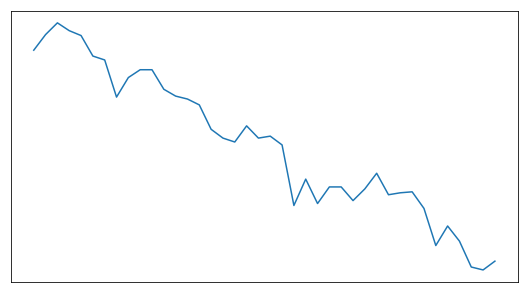

In [29]:
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 20}

# plt.rc('font', **font)

# data = pd.read_csv(ibm_path,header=0)
# data["timestamp"] = data["Date"]
# del data["Date"]
# data["value"] = data["IBM common stock closing prices"]
# del data["IBM common stock closing prices"]

# f = plt.figure(figsize=(20,5))
# ax = f.add_subplot(122)
# ax.plot(data["value"][630:670])
# ax.set_xticks([], [])
# ax.set_yticks([], [])
# f.savefig("trend.eps",bbox_inches='tight',transparent=True)

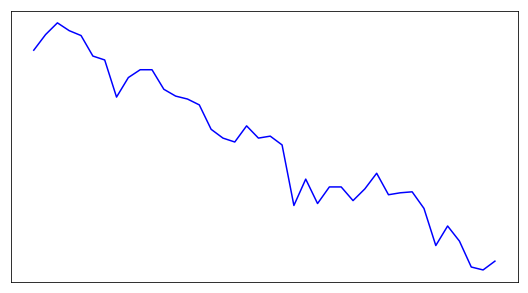

In [3]:
# DMKD section 2.1
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 20}

plt.rc('font', **font)

data = pd.read_csv(ibm_path,header=0)
data["timestamp"] = data["Date"]
del data["Date"]
data["value"] = data["IBM common stock closing prices"]
del data["IBM common stock closing prices"]

f = plt.figure(figsize=(20,5))
ax = f.add_subplot(122)
ax.plot(data["value"][630:670],color="blue")
ax.set_xticks([], [])
ax.set_yticks([], [])
f.savefig("trend.eps",bbox_inches='tight',transparent=True)